### 1. Import Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time

from collections import Counter
from googletrans import Translator

In [89]:
df = pd.read_csv("dataset.csv")
data = df.copy()
data.head()

,Job,Company,City,Work Type,Work Model,Salary,Experience Level,Skills
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,NaN,"Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,NaN,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale..."
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf..."
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,Associate,"Decision Trees, Linear Regression, Python, Sup..."
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا..."


### 2. Exploratory Data Analysis(EDA)

#### Number of jobs collected

In [90]:
nb_jobs = data.shape[0]
print("Number of jobs:",nb_jobs)

Number of jobs: 257


#### Top hiring Cities 

In [91]:
lst = []
for i in range(0,257):
        cities = data['City'][i].replace(',',' ').replace('-',' ').replace('Mechouar','Casablanca').replace('Prefecture','Casablanca').replace('Sidi','Sidi_Ifni').replace('Agdal','Rabat').replace('Dar','Casablanca').replace('Aîn','Casablanca').replace('Fès','Fez').split(' ')
        lst.append(cities[0])
        i+=1

count_cities = Counter(lst)
unique_cities = list(count_cities.items())
cnames = []
ccount = []
for j in range(0,11):
        city_name = unique_cities[j][0]
        city_count = unique_cities[j][1]
        cnames.append(city_name)
        ccount.append(city_count)
print(cnames)
print(ccount)

['Casablanca', 'Rabat', 'Fez', 'Morocco', 'Temara', 'Marrakesh', 'Tangier', 'Agadir', 'Sidi_Ifni', 'Dakhla', 'Meknes']
[156, 66, 4, 12, 1, 9, 5, 1, 1, 1, 1]


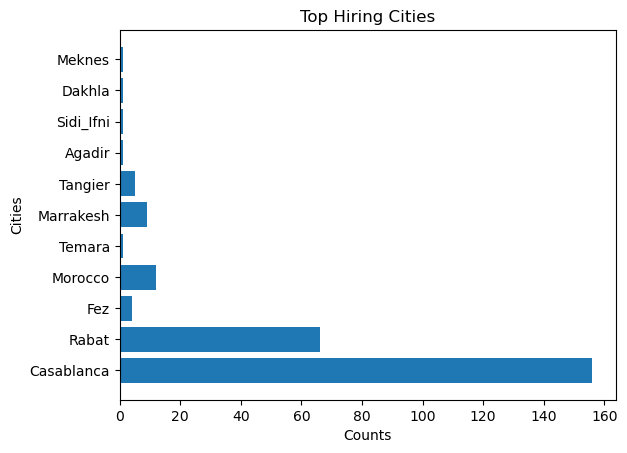

In [68]:
fig,ax = plt.subplots()
ax.barh(cnames, width=ccount)
plt.xlabel("Counts")
plt.ylabel("Cities")
plt.title("Top Hiring Cities")
plt.show()

<font color=sky-blue>Interpretation</font><br>
Casablanca and Rabat offer more jobs opportunities compared to other cities.

#### Most model work In demand(Full-time, Part-time etc)

In [69]:
#Replace some of work type with NaN
l = ["Mid-Senior level","Entry level","Associate","Director"]
data['Work Type']=data['Work Type'].replace(l, np.nan)
data['Work Type'].value_counts()

Work Type
Full-time     202
Internship      8
Part-time       6
Contract        4
Temporary       1
Name: count, dtype: int64

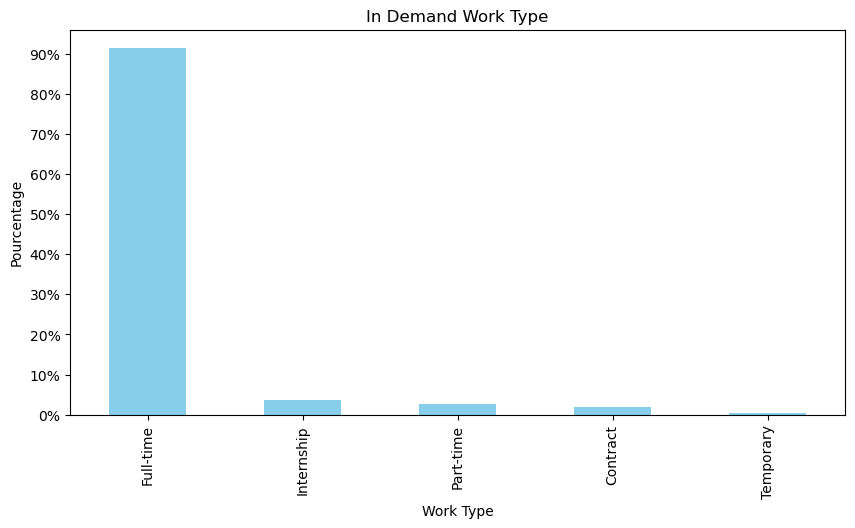

In [70]:
type_jobs = data['Work Type'].value_counts()
len_jobs = type_jobs.sum()
ax = type_jobs.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Type")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Type")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_jobs,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_jobs))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Full-time jobs are high demand types of work.

#### Analysing Work Model(Remote, on-site, hybride)

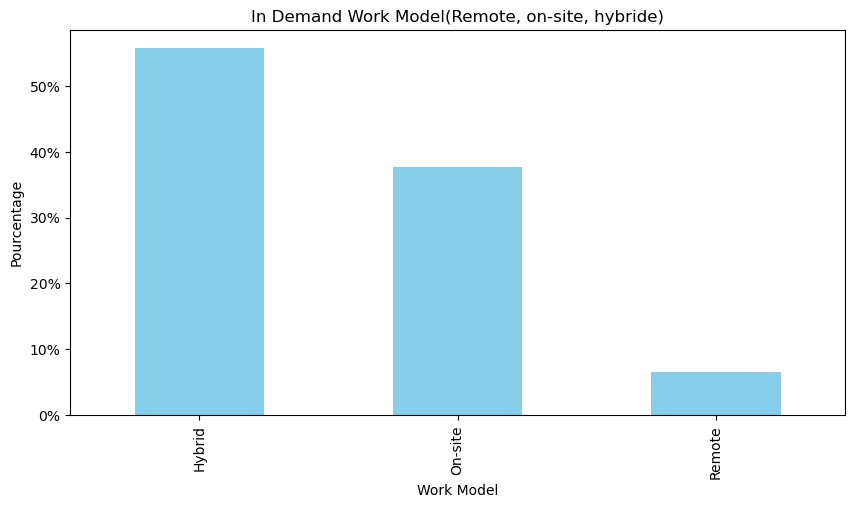

In [71]:
model_work = data['Work Model'].value_counts()
len_work_model = model_work.sum()
ax = model_work.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Model")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Model(Remote, on-site, hybride)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_work_model,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_work_model))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Hybride type of work is the most demanded in job markets.

#### Analysing Seniority Level(Mid-Senior level, Associate, Entry level etc)

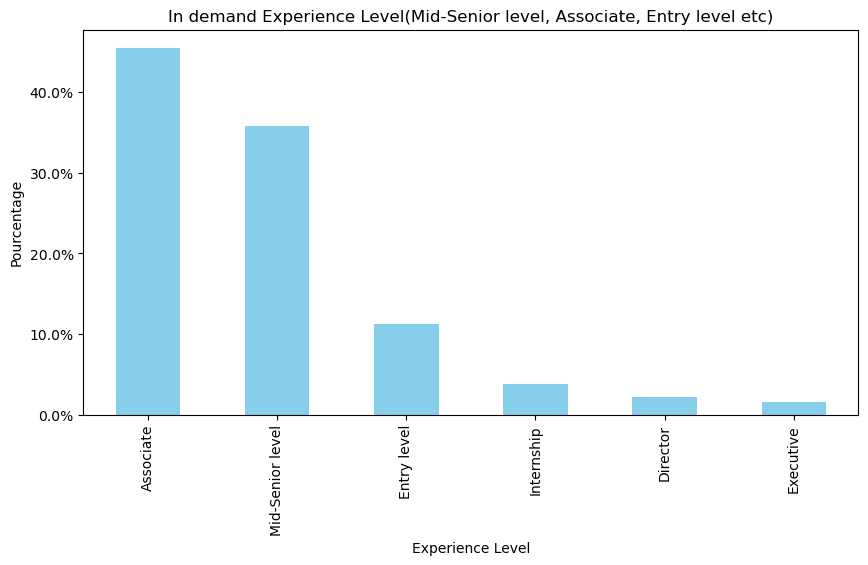

In [72]:
seniority = data['Experience Level'].value_counts()
len_seniority = seniority.sum()
ax = seniority.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Experience Level")
plt.ylabel("Pourcentage")
plt.title("In demand Experience Level(Mid-Senior level, Associate, Entry level etc)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_seniority,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_seniority))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Associate work dominates other experience levels.

#### Analysing Companies 

In [73]:
data['Company'].value_counts()

Company
CGI                                                  17
Deloitte                                             14
Orange Business Maroc                                12
SQLI                                                 10
Société Générale - Africa Technologies & Services    10
                                                     ..
BCG Platinion                                         1
JESA S.A                                              1
CREDIT DU MAROC                                       1
MAROCLEAR                                             1
Avito.ma - Frontier Digital Ventures                  1
Name: count, Length: 89, dtype: int64

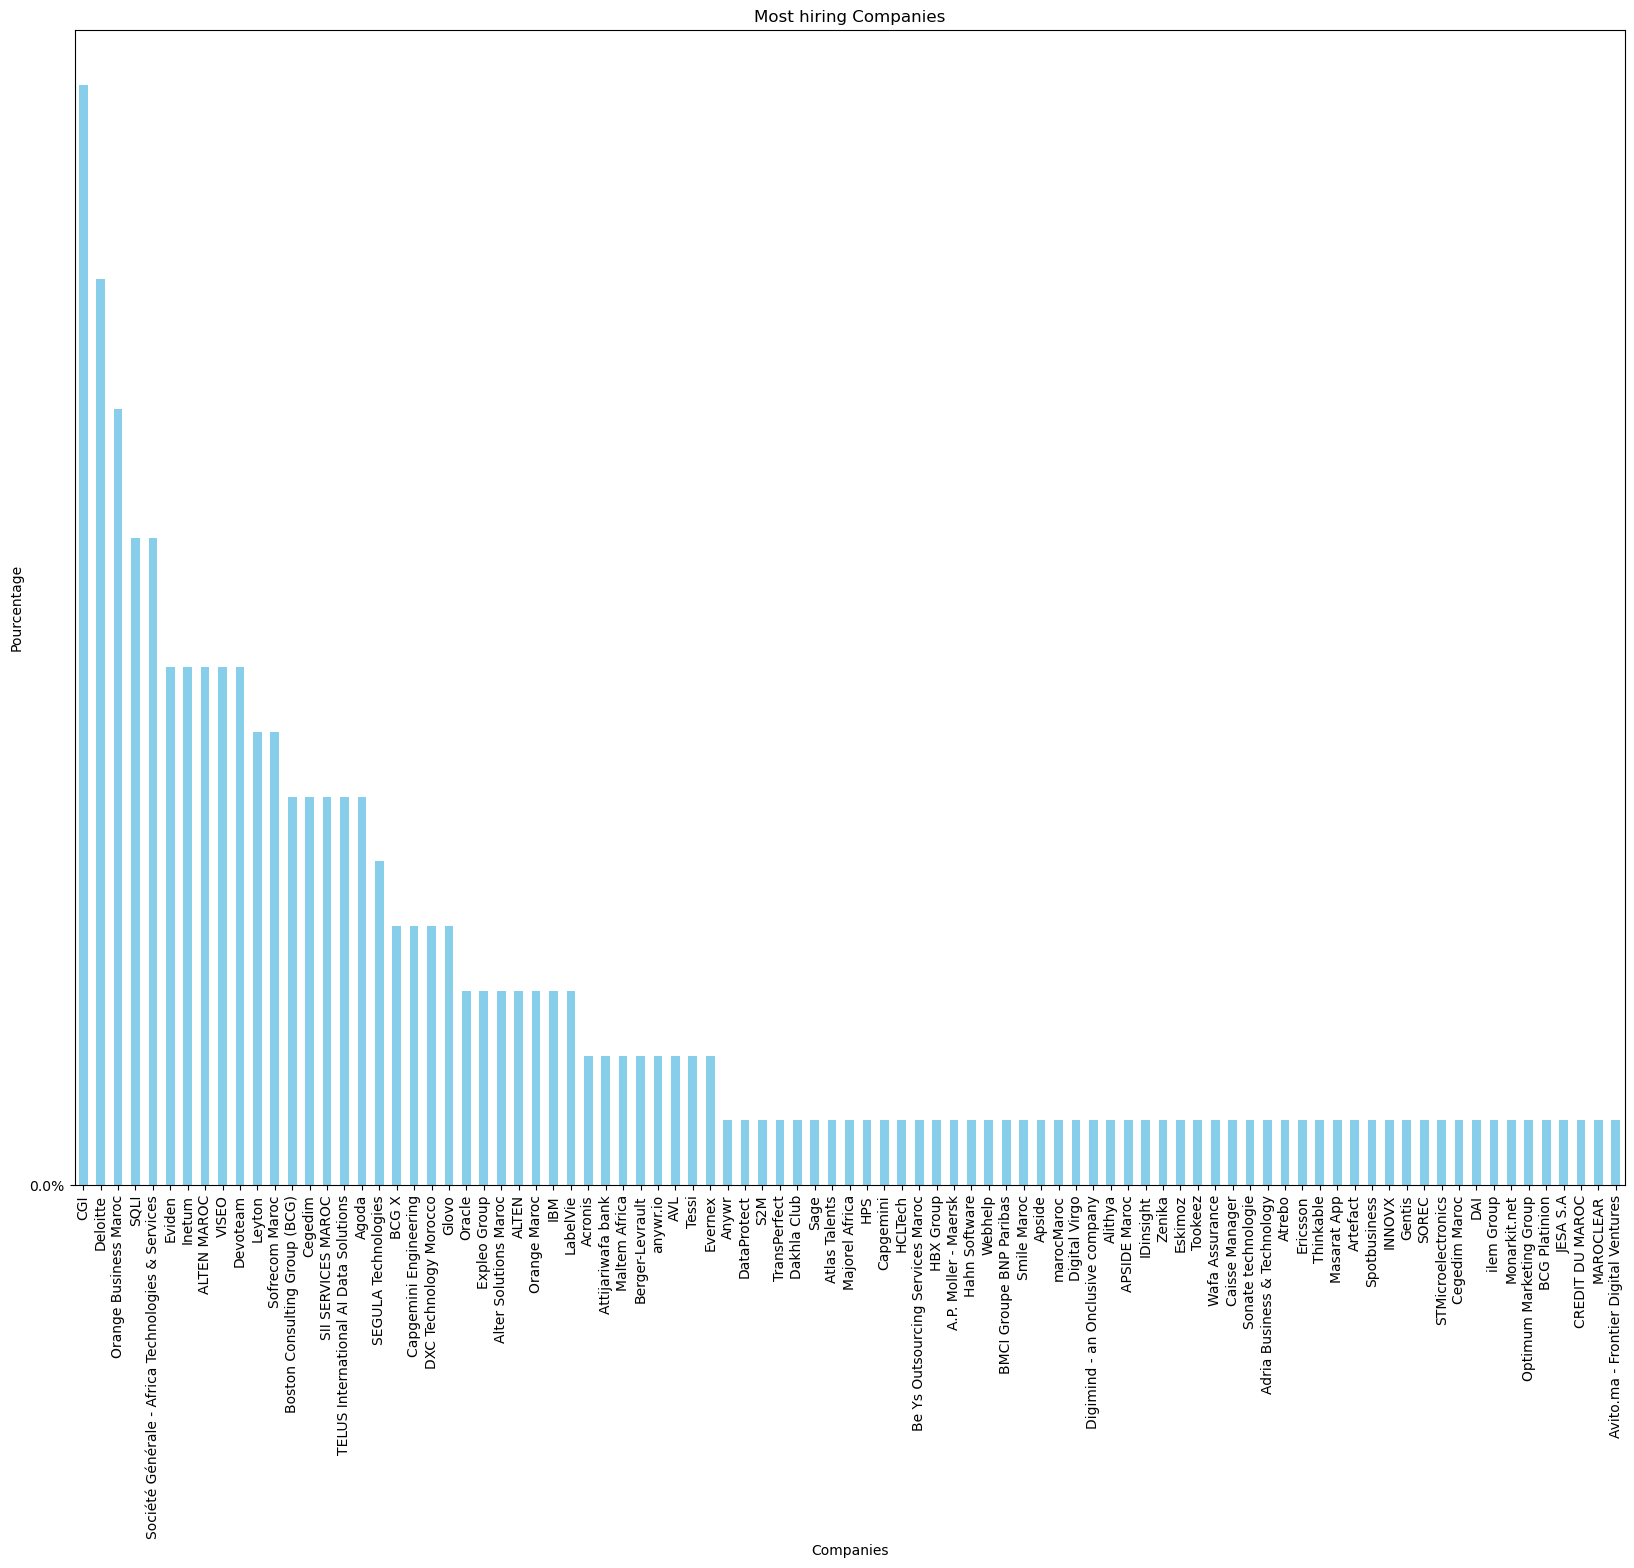

In [74]:
companies = data['Company'].value_counts()
len_companies = companies.sum()
ax = companies.plot(kind='bar', figsize=(20,15),  color='skyblue')
plt.xlabel("Companies")
plt.ylabel("Pourcentage")
plt.title("Most hiring Companies")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_companies,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_companies))
plt.show()

<font color=sky-blue>Interpretation</font><br>


### 3. Data Pre-processing

#### 3.1. Data Cleaning

##### Handling missing values

In [92]:
#Handling missing values
missing_values = data.isnull().sum()
total_missing = missing_values.sum()
total_cells = np.product(data.shape)
percent_missing = (total_missing/total_cells)*100
print(missing_values)
print("Percentage of missing values:",percent_missing)

Job                   0
Company               0
City                  0
Work Type             9
Work Model           29
Salary              257
Experience Level     70
Skills                8
dtype: int64
Percentage of missing values: 18.1420233463035


In [93]:
#remove column salary because its empty
data.drop(columns=["Salary"], inplace=True)#True means drop original dataframe, False return new dataframe without modifying new dataframe

##### Filling in missing values

In [94]:
data = data.fillna(method='ffill')
data['Experience Level'] = data['Experience Level'].fillna(value='Associate')
data.head()

C:\Users\info\AppData\Local\Temp\ipykernel_11492\3945319758.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,Job,Company,City,Work Type,Work Model,Experience Level,Skills
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,Associate,"Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale..."
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf..."
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,Associate,"Decision Trees, Linear Regression, Python, Sup..."
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا..."


In [95]:
data.isna().sum()

Job                 0
Company             0
City                0
Work Type           0
Work Model          0
Experience Level    0
Skills              0
dtype: int64

##### In demand Programming langages 

In [146]:
#Translation
#Translate Arabic skills into English
translator = Translator()
skills = data["Skills"]
time.sleep(10)
df_skills = pd.DataFrame(skills)

def transalate_text(text):
    translation = translator.translate(text, src='ar', dest='en')
    return translation.text
df_skills['Skills'] = df_skills['Skills'].apply(transalate_text)

In [162]:
#Count skills
skills_list = [skill.strip() for sublist in df_skills['Skills'].str.split(',') for skill in sublist]#skill in sublist of splitted skills
count_skills = pd.Series(skills_list).value_counts()
count_skills

English                     56
Communications              40
Java                        27
French                      24
communications              18
                            ..
Product Promotion            1
Graphic Design Principes     1
Software Design              1
Web Applications             1
Cost Reports                 1
Name: count, Length: 1170, dtype: int64

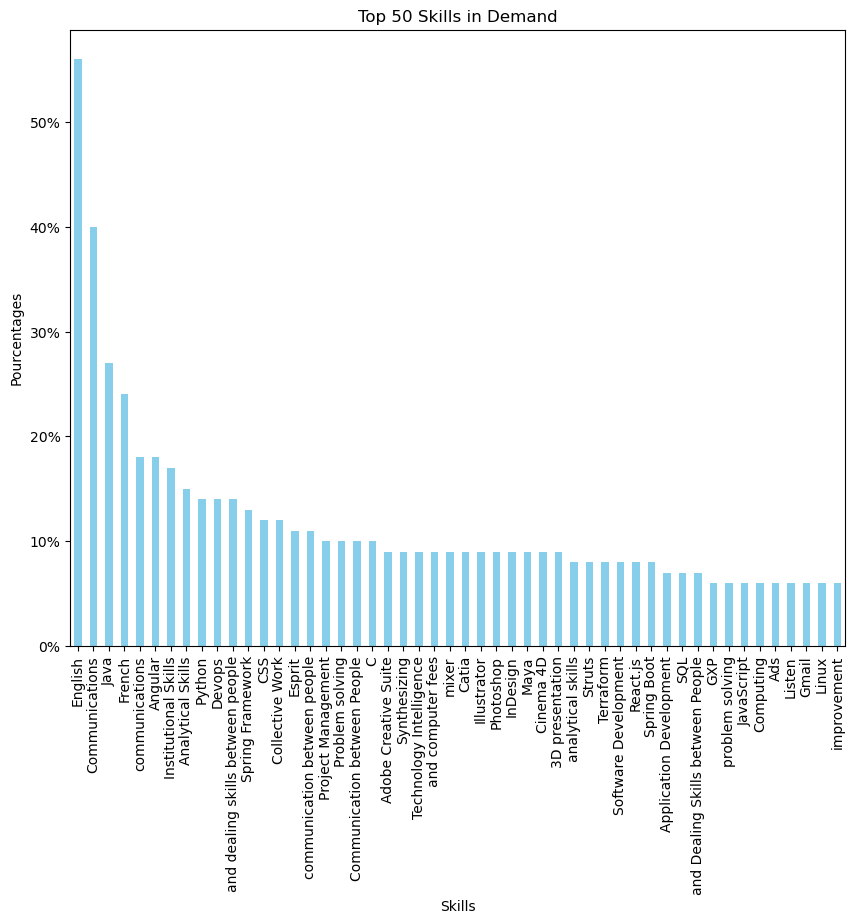

In [185]:
top_skills = count_skills.head(50)
ax = top_skills.plot(kind='bar', figsize=(10,8),  color='skyblue')
plt.xlabel("Skills")
plt.ylabel("Pourcentages")
plt.title("Top 50 Skills in Demand")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=10))
plt.show()

<font color=sky-blue>Interpretation</font><br>


##### Most Job titles in demand

<font color=sky-blue>Interpretation</font><br>


##### Character Encodings: Coverting categorical features into integers using:  Label Encoding or One Hot Encoding

#### 3.2. Data Transformation

##### Scaling and Normalization


#### 3.3. Devide data Train set/Test set

### 4. Modeling

### 5. Evaluation